In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

%config IPCompleter.greedy=True
%matplotlib inline

Total_classes = 10

Using TensorFlow backend.


In [2]:
# Limit GPU memory consumption to 30%
import tensorflow as tf
from   keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto(device_count={'CPU': 2},
                        intra_op_parallelism_threads=2)
set_session(tf.Session(config=config))

## Visualização dos dados

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("Imagens de treino (X) 28 x 28", x_train.shape)
print("Classes de treino (y)", y_train.shape)

print("Imagens de teste (X) 28 x 28", x_test.shape)
print("Classes de treino (y)", y_test.shape)

Imagens de treino (X) 28 x 28 (60000, 28, 28)
Classes de treino (y) (60000,)
Imagens de teste (X) 28 x 28 (10000, 28, 28)
Classes de treino (y) (10000,)


In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print("Imagens de treino (x) 28 x 28:", x_train.shape)
print("Quantidade de imagens de treino: ", x_train.shape[0])
print("Quantidade de imagens de teste: ", x_test.shape[0])

shape_entrada = (28, 28, 1)

Imagens de treino (x) 28 x 28: (60000, 28, 28, 1)
Quantidade de imagens de treino:  60000
Quantidade de imagens de teste:  10000


In [6]:
# Convetendo os valores para float para lidarmos com os valores normalizados
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizando os dados pelo valor máximo de pixel
x_train /= 255
x_test /= 255

print('Imagens de treino (x) 28 x 28:', x_train.shape)
print('Quantidade de imagens de treino: ', x_train.shape[0])
print('Quantidade de imagens de teste: ', x_test.shape[0])

Imagens de treino (x) 28 x 28: (60000, 28, 28, 1)
Quantidade de imagens de treino:  60000
Quantidade de imagens de teste:  10000


In [110]:
# Construindo um modelo sequencial
model = Sequential()
model.add(Conv2D(28, kernel_size=(3), input_shape=shape_entrada))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))

# A camada final, determinará qual classe escolher. Por tal razão ela possui a ativação Softmax, que retorna
# a probabilidade por classe
model.add(Dense(10,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 43s 719us/step - loss: 0.1723 - acc: 0.94881s
Epoch 2/10
60000/60000 [==============================] - 42s 695us/step - loss: 0.0811 - acc: 0.9761
Epoch 3/10
60000/60000 [==============================] - 42s 698us/step - loss: 0.0581 - acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 42s 703us/step - loss: 0.0455 - acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 44s 730us/step - loss: 0.0361 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 43s 710us/step - loss: 0.0304 - acc: 0.99081s - loss: 0.
Epoch 7/10
60000/60000 [==============================] - 44s 727us/step - loss: 0.0258 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 42s 703us/step - loss: 0.0219 - acc: 0.9932
Epoch 9/10
60000/60000 [==============================] - 42s 699us/step - loss: 0.0186 - acc: 0.9938
Epoch 10/10
60000/60000 [==============================] - 42s 699u

In [116]:
# Salvando o modelo no formato HDf5
model.save("./model.h5")
# Arquitetura das camadas em JSSON e pesos treinados em HDF5
model.save_weights("./weights.h5")

In [11]:
score = model.evaluate(x_test, y_test)

print('Perda (teste):', score[0])
print('Acurácia (teste):', score[1])

print(model.metrics_names)

10000/10000 [==============================] - 3s 309us/step
Perda (teste): 0.05273456000061123
Acurácia (teste): 0.9829
['loss', 'acc']


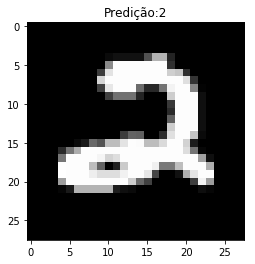

In [105]:
image_index = 0
pred = model.predict(teste[image_index].reshape(1, 28, 28, 1))
plt.title("Predição:" + str(pred.argmax()))
plt.imshow(teste[image_index].reshape(28, 28),cmap='gray')

In [45]:
csv_test = pd.read_csv('./Data/test.csv')

<class 'pandas.core.frame.DataFrame'>


C:\Users\jonny\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
teste = csv_test.as_matrix()
teste = teste.astype('float32')
teste /= 255

C:\Users\jonny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [96]:
teste = teste.reshape(teste.shape[0], 28, 28, 1)

In [118]:
f = open("predicoes.csv", "a")
f.write('ImageId,Label')

13

In [119]:
for i in range(0, len(teste)):
    f.write('\n%d,%d'% ((i+1), model.predict(teste[i].reshape(1, 28, 28, 1)).argmax()))
f.close()